# Previsão de Vendas em **Supermercado**

<strong> 1° Problema de Negócio </strong>


  Os cientistas de dados do SuperMercado DIA-A-DIA coletaram dados de vendas dos últimos 3 anos para 1559 produtos em 10 lojas em diferentes cidades.  

Além disso, foram determinados vários atributos de cada produto e loja para um  trabalho Ciência de Dados.

O objetivo é criar um modelo de Machine Learning para prever as vendas de cada produto numa determinada loja para o próximo ano.

Por meio do resultado das previsões, o SuperMercado tentará entender as propriedades de produtos e lojas para estimar o aumento das vendas e,  consequentemente, do faturamento do Supermercado.





https://gist.github.com/regispires/acb4cb3112f611160fa0dc6c687feab7

https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

<strong> 2° Onde estão os dados? </strong>

In [2]:
# Importação das Bibliotecas necessárias para o trabalho
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
!pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bd990954432f6b04a7516a256c6cf4c754bd1f65dc3d01caa34f06724453b761
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

<strong> 3° Análise Exploratória dos Dados </strong>

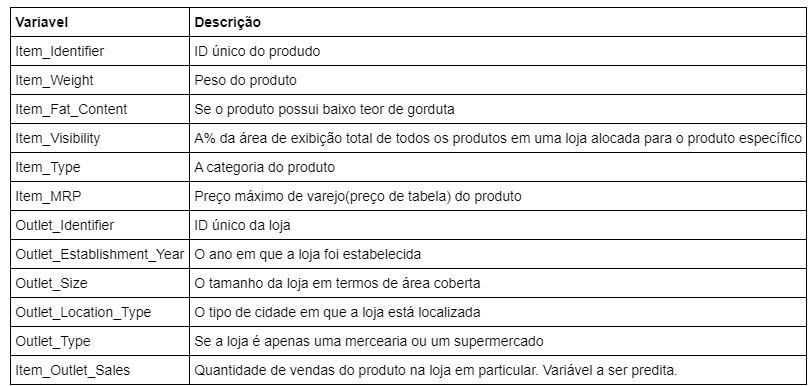

In [ ]:
# Arquitetura dos Dados
from PIL import Image
%matplotlib inline
im = Image.open("AD.JPG")
im.show()
im

In [3]:
# Importando os dados de treino e teste
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Visualizando o 5 primeiros registros
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [4]:
# shape dos dados
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


In [6]:
# Pré-processamento dos dados - Amostra Treino e Teste

# Dados de Treino - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

# Dados de Teste - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

<strong> 4° Machine Learning  </strong>

In [7]:
# Modelagem

## Criação do Modelo - Linear Regression
model_L = LinearRegression()

# obs: Você pode adicionar parâmetros e testar para ver se melhora o resultado da sua predição
# Como por exemplo os parâmetros "fit_intercept" e "normalize"
# Documentação do sklearn LinearRegression:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
# Treino do modelo - Dados de Treino
model_L.fit(train_x,train_y)

# Coeficientes do modelo Treinado
print('\nCoefficient of model :', model_L.coef_)

# intercepto do Modelo
print('\nIntercept of model',model_L.intercept_)




Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model -121926.97473298338


In [9]:
# Fazendo Previsões com os dados de treino
predict_train = model_L.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train)




Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [10]:
# Calculando o RMSE Root Mean Squared Error - nos dados de treino
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)




RMSE on train dataset :  1135.8159344155245


In [11]:
# # Fazendo Previsões com os dados de teste
predict_test = model_L.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test)




Item_Outlet_Sales on test data [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.4756877    129.4629475   4259.8975191   3732.152259

In [12]:
# Calculando o RMSE Root Mean Squared Error - nos dados de teste
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209719


In [14]:
# Criando o Melhor modelo - RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=5)

# Treinando o modelo - Dados de Treino
model_RFR.fit(train_x, train_y)

# Fazendo previsões com os dados de treino e teste
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Calculando o RMSE Root Mean Squared Error
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1022.0010078523482
RMSE on test data:  964.1960268492148


<strong> 5° Fazendo as Previsões </strong>

In [15]:
# Fazendo novas previsões predict the target on the testing dataset
predict_test = model_RFR.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test)



Item_Outlet_Sales on test data [1412.38157886 3002.31513785 2710.78926442 2603.82744154 2554.2796167
 3973.04560083 2679.84689169 1407.9252514  4217.19793458  334.87580826
 1743.0221744   451.1249331   307.61060906 1576.58187779 2608.71830545
 1082.22891493 2530.73290685 1810.7126661  2237.71868994 3964.13221745
  716.82759817 1398.24144295 2577.47821232 2917.02324367 1713.06787575
 1407.9252514   741.83226684 2144.91087872 2860.99085886 1830.16672167
 1803.46661136 2940.00919684 2549.98108869  376.89546166 4057.3269577
 2236.20087985 1720.64011162 2980.99470976 2673.1005278  3613.62650114
 1108.46514911  738.03006164  147.19272546 1398.24144295  728.45548
 2625.00789449 3568.48445622 2665.13032663 1345.06382915  222.31208728
 2431.51210426 3871.98783198 1621.95309047 2602.63286896 1579.52584527
  800.51137806 2919.54574503 1703.85711433 2221.21066816 2971.80489086
  285.35823907  249.69122196 3902.62817929 3957.95669292 4357.83046867
  786.9123454  1808.30616362  712.65781035  856.28


# Explicação do Resultado e Saída Final

->Item_Outlet_Sales on test data [1412.38, 3002.31, ..., 777.42]

Cada número representa a previsão do modelo para as vendas de um produto específico em uma loja específica no conjunto de teste.

**Por exemplo, o valor 1412.38 é a previsão de vendas para o primeiro item no conjunto de teste.**

Contexto:

* O modelo Random Forest Regressor utilizou as características dos produtos e lojas para prever essas vendas.
* Essas previsões podem ajudar o supermercado a tomar decisões estratégicas, como planejamento de estoques, promoções ou campanhas de marketing.